In [1]:
import pandas as pd

apt_price = pd.read_csv('./apt_price_2022.csv', encoding='cp949', thousands=',', skiprows=15)
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구


In [2]:
# 구조파악
apt_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       16947 non-null  object 
 1   번지        16943 non-null  object 
 2   본번        16946 non-null  float64
 3   부번        16946 non-null  float64
 4   단지명       16947 non-null  object 
 5   전용면적(㎡)   16947 non-null  float64
 6   계약년월      16947 non-null  int64  
 7   계약일       16947 non-null  int64  
 8   거래금액(만원)  16947 non-null  int64  
 9   층         16947 non-null  int64  
 10  건축년도      16945 non-null  float64
 11  도로명       16947 non-null  object 
 12  해제사유발생일   665 non-null    float64
 13  거래유형      16947 non-null  object 
 14  중개사소재지    16947 non-null  object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.9+ MB


In [3]:
# 시군구 칼럼
apt_price["시군구"]

0        서울특별시 강남구 개포동
1        서울특별시 강남구 개포동
2        서울특별시 강남구 개포동
3        서울특별시 강남구 개포동
4        서울특별시 강남구 개포동
             ...      
16942    서울특별시 중랑구 중화동
16943    서울특별시 중랑구 중화동
16944    서울특별시 중랑구 중화동
16945    서울특별시 중랑구 중화동
16946    서울특별시 중랑구 중화동
Name: 시군구, Length: 16947, dtype: object

In [4]:
# 구별, 동별 통계를 내기 위해서 한 덩어리의 문자열을 나눠주어야 한다.
apt_price["시군구"][0].split() # 공백기준 문자열 분리
# 행의 갯수만큼 반복을 해주어야 하는데, for문으로 이를 처리하려면 코드가 너무 두꺼워진다.

['서울특별시', '강남구', '개포동']

In [5]:
apt_price["전용면적(㎡)"] # + - * / 등의 연산의 경우 각 항목에 대해 반복적으로 연산을 시행하고 그 결과를 자동으로 시리즈 형식으로 반환해줌.

0        79.97
1        79.97
2        79.97
3        79.97
4        79.97
         ...  
16942    59.76
16943    84.03
16944    84.69
16945    84.69
16946    76.43
Name: 전용면적(㎡), Length: 16947, dtype: float64

In [6]:
# 문자열도 위의 숫자형 데이터에 대한 연산처럼 각각 항목에 대해 반복적으로 split() 작업을 수행해주는 메서드가 있다.
# Accessor .str
apt_price["시군구"].str.split() 
# str 접근자가 문자열에 대한 자동 반복을 시켜준다. 시리즈.str.함수명() 
# > 시리즈 각 항목별로 문자열에 함수를 적용시켜주고 다시 이를 시리즈로 모아 반환을 시켜준다.
# str 접근자는 문자열이 아니면 TypeError가 난다.
# 개발자가 타입이 문자열인 것을 정확히 인지한 상태에서 사용해야 한다.

0        [서울특별시, 강남구, 개포동]
1        [서울특별시, 강남구, 개포동]
2        [서울특별시, 강남구, 개포동]
3        [서울특별시, 강남구, 개포동]
4        [서울특별시, 강남구, 개포동]
               ...        
16942    [서울특별시, 중랑구, 중화동]
16943    [서울특별시, 중랑구, 중화동]
16944    [서울특별시, 중랑구, 중화동]
16945    [서울특별시, 중랑구, 중화동]
16946    [서울특별시, 중랑구, 중화동]
Name: 시군구, Length: 16947, dtype: object

In [7]:
# 위의 데이터에서 ~~구 항목만 뽑아내고 싶을 때
apt_price["시군구"].str.split().str[1]
# 문자열에 한해 사용할 수 있는 반복 접근자 str

0        강남구
1        강남구
2        강남구
3        강남구
4        강남구
        ... 
16942    중랑구
16943    중랑구
16944    중랑구
16945    중랑구
16946    중랑구
Name: 시군구, Length: 16947, dtype: object

In [8]:
# 시군구에서 구를 분리, 구 칼럼에 저장
apt_price["구"] = apt_price["시군구"].str.split().str[1]
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구


In [9]:
# 구 별로 추출 가능. 구별 통계 가능
# 강남구 거래건만 추출하기
apt_price[apt_price['구'] == '강남구']

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.970,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.970,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.970,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.970,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.970,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,서울특별시 강남구 청담동,113,113.0,0.0,"청담힐A동,진도B동",204.960,202111,5,338000,5,1997.0,압구정로77길 42,NaN,중개거래,서울 강남구,강남구
1046,서울특별시 강남구 청담동,75-1,75.0,1.0,현대아파트(75-1),159.080,202109,6,311000,11,1983.0,학동로87길 7,NaN,-,-,강남구
1047,서울특별시 강남구 청담동,75-1,75.0,1.0,현대아파트(75-1),159.080,202109,6,311000,11,1983.0,학동로87길 7,NaN,-,-,강남구
1048,서울특별시 강남구 청담동,101-17,101.0,17.0,효성빌라청담101(B동),226.620,202204,12,747000,5,2019.0,압구정로71길 28,NaN,중개거래,서울 강남구,강남구


In [10]:
# 강남 3구 (강남구, 송파구, 서초구)의 거래건수만 추출하기
apt_price[apt_price["구"].isin(["강남구", "송파구","서초구"])]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,서울특별시 송파구 풍납동,261,261.0,0.0,현대리버빌2지구,84.97,202109,23,134900,8,1999.0,풍성로24길 42,NaN,-,-,송파구
13084,서울특별시 송파구 풍납동,261,261.0,0.0,현대리버빌2지구,84.97,202111,22,138000,13,1999.0,풍성로24길 42,NaN,중개거래,서울 송파구,송파구
13085,서울특별시 송파구 풍납동,261,261.0,0.0,현대리버빌2지구,59.40,202112,11,107000,10,1999.0,풍성로24길 42,NaN,중개거래,서울 송파구,송파구
13086,서울특별시 송파구 풍납동,261,261.0,0.0,현대리버빌2지구,40.95,202202,10,61000,1,1999.0,풍성로24길 42,NaN,중개거래,서울 송파구,송파구


In [11]:
# 시군구에서 동을 분리, 동칼럼에 저장
apt_price["동"] = apt_price["시군구"].str.split().str[2]
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동


In [12]:
# 거래건수가 제일 많은 구 이름과 건수를 출력
max_name=""
max_count=0
# 사용된 구이름 목록 추출
구이름 = apt_price['구'].unique()
# 구 이름을 반복(for)
for 구 in 구이름:
#     print(구, apt_price[apt_price['구'] == 구].shape[0])
    거래건수 = apt_price[apt_price['구'] == 구].shape[0]
    if 거래건수 > max_count:
        max_count = 거래건수
        max_name = 구

print("거래건수가 가장 많은 구:",max_name, max_count)
# 가장 원초적인 방법.

거래건수가 가장 많은 구: 노원구 1197


In [13]:
# 문자열을 날짜로 변환
pd.to_datetime("2022-12-25").dayofweek #yyyy-mm-dd hh:mm:ss 형식 
# dt.dayofweek >>  0-월, 1-화, 2-수, 3-목, 4-금, 5-토, 6-일


6

In [14]:
pd.to_datetime("09/06/2022").dayofweek #yyyymmdd 형식가능, mmddyyyy불가능, mm/dd/yyyy 가능

1

In [15]:
# 변환 형식. %Y:년 %m:월 %d:일 %H:시간 %M:분 %S:초 
pd.to_datetime("06/09/2022",format="%d/%m/%Y").dayofweek 

1

In [16]:
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동


In [17]:
계약날짜 = apt_price['계약년월'].astype(str) + apt_price['계약일'].astype(str)

apt_price["계약요일"] = pd.to_datetime(계약날짜, format = "%Y%m%d").dt.dayofweek
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,계약요일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동,3
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,5
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,3
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,3
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동,5


In [18]:
# 평방미터를 평으로 변환
apt_price["평"] = apt_price['전용면적(㎡)'] / 3.03

In [19]:
# 평을 크기구간으로 나누기
# 10평미만, 10평대, 20평대, 30평대, 40평대, 50평이상
apt_price['평형'] = pd.cut(
    apt_price['평'],
    bins=[0, 10, 20, 30, 40, 50, 100],
    labels='10평미만,10평대,20평대,30평대,40평대,50평이상'.split(",")
    
)
# apt_price["평"]
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,계약요일,평,평형
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동,3,26.392739,20평대
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,5,26.392739,20평대
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,1,26.392739,20평대
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,3,26.392739,20평대
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,4,26.392739,20평대


In [20]:
apt_price['평'].max() # 이런식으로 구간의 최대값을 구할 수 있음

99.49504950495052

In [21]:
apt_price[apt_price['평'] == 99.49504950495052]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,계약요일,평,평형
447,서울특별시 강남구 도곡동,467,467.0,0.0,타워팰리스1,301.47,202205,12,870000,56,2002.0,언주로30길 56,NaN,중개거래,서울 강남구,강남구,도곡동,3,99.49505,50평이상


In [22]:
apt_price.groupby("구").mean()

/tmp/ipykernel_4432/3510609890.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  apt_price.groupby("구").mean()


,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,계약요일,평
구,,,,,,,,,,,
강남구,479.358095,5.893333,88.195735,202162.843810,15.435238,221598.257143,10.051429,2001.432381,2.021802e+07,2.758095,29.107503
강동구,425.307990,4.979381,61.915821,202156.461340,15.378866,90506.402062,10.153351,2007.457474,2.021637e+07,2.947165,20.434264
강북구,663.903346,11.847584,72.228146,202164.657993,15.572491,65987.211896,8.278810,2004.278810,2.021920e+07,2.776952,23.837672
강서구,771.742607,8.395400,63.221084,202161.217963,15.449069,70976.605696,7.313253,2005.723987,2.021690e+07,2.557503,20.865044
관악구,1381.802432,15.685410,62.600923,202158.889058,14.989362,67922.066869,8.898176,2005.253799,2.021866e+07,2.998480,20.660371
광진구,469.189759,7.075301,77.820929,202163.533133,15.042169,119569.653614,10.177711,2001.385542,2.021744e+07,2.822289,25.683475
구로구,441.530289,15.017707,58.442002,202164.369059,15.369059,57413.853681,9.169618,2003.951538,2.021862e+07,2.906803,19.287789
금천구,747.606880,10.085995,63.062557,202160.039312,15.574939,58505.552826,10.545455,2004.845209,2.021916e+07,3.002457,20.812725
노원구,598.822891,1.126149,61.797028,202162.744361,15.203008,70980.284043,8.451128,1994.629073,2.021773e+07,2.955723,20.395059


In [23]:
apt_price['거래금액(만원)'].describe()

count    1.694700e+04
mean     1.053820e+05
std      9.384846e+04
min      7.600000e+03
25%      5.000000e+04
50%      8.390000e+04
75%      1.300000e+05
max      1.450000e+06
Name: 거래금액(만원), dtype: float64

In [24]:
# 거래금액(만원)의 값을 기준으로
# 1억미만, 5억미만, 10억미만, 20억미만, 50억미만, 50억이상
# 구간으로 나누기. "가격대" 칼럼에 저장
apt_price['가격대'] = pd.cut(
    apt_price['거래금액(만원)'],
    bins = [0, 10000, 50000, 100000, 200000, 500000, 99999999],
    right=False,
    labels = '1억미만,5억미만,10억미만,20억미만,50억미만,50억이상'.split(",")
)
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,계약요일,평,평형,가격대
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,언주로 3,NaN,-,-,강남구,개포동,3,26.392739,20평대,50억미만
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,5,26.392739,20평대,50억미만
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,1,26.392739,20평대,50억미만
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,3,26.392739,20평대,50억미만
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,4,26.392739,20평대,50억미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,...,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2,19.722772,10평대,10억미만
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,...,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2,27.732673,20평대,10억미만
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,...,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,3,27.950495,20평대,10억미만
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,...,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동,5,27.950495,20평대,5억미만


In [25]:
# 가격대별 거래건수( count() ) 출력
apt_price.groupby('가격대')["시군구"].count() # count()를 통해 건수 찾기가 목적이기 때문에 뒤에 오는 칼럼명은 아무거나 와도 상관 없음.

가격대
1억미만      144
5억미만     4066
10억미만    6154
20억미만    4783
50억미만    1656
50억이상     144
Name: 시군구, dtype: int64

In [26]:
# 강남3구의 평형별 평균 거래가 출력
print(apt_price[apt_price['구'].isin(["강남구","송파구","서초구"])].groupby('평형')['거래금액(만원)'].mean())
# 강남3구 이외 지역의 평형별 평균 거래가 출력
print(apt_price[~apt_price["구"].isin(["강남구","송파구","서초구"])].groupby('평형')['거래금액(만원)'].mean())

평형
10평미만     38641.613924
10평대     104418.583653
20평대     218721.917749
30평대     272757.804196
40평대     321232.035088
50평이상    371993.000000
Name: 거래금액(만원), dtype: float64
평형
10평미만     19561.848963
10평대      73652.676027
20평대     100975.983959
30평대     133685.202020
40평대     164742.168539
50평이상    317550.426087
Name: 거래금액(만원), dtype: float64


In [27]:
강남3구 = apt_price[apt_price['구'].isin(["강남구","송파구","서초구"])].groupby('평형')['거래금액(만원)'].mean()
이외지역 = apt_price[~apt_price["구"].isin(["강남구","송파구","서초구"])].groupby('평형')['거래금액(만원)'].mean()
강남3구-이외지역

평형
10평미만     19079.764961
10평대      30765.907626
20평대     117745.933790
30평대     139072.602176
40평대     156489.866548
50평이상     54442.573913
Name: 거래금액(만원), dtype: float64

In [28]:
# 구별, 평형별 평균거래금액
apt_price.groupby(['구','평형'])[["거래금액(만원)"]].mean()

거래금액(만원)
구   평형                  
강남구 10평미만   33865.333333
    10평대   105269.816514
    20평대   229398.685512
    30평대   287276.598291
    40평대   334955.964912
...                  ...
중랑구 10평대    56368.248175
    20평대    75790.885417
    30평대   105100.000000
    40평대   105238.888889
    50평이상  208000.000000

[150 rows x 1 columns]

In [29]:
apt_price.pivot_table(index='구', columns='평형', values='거래금액(만원)')

평형,10평미만,10평대,20평대,30평대,40평대,50평이상
구,,,,,,
강남구,33865.333333,105269.816514,229398.685512,287276.598291,334955.964912,440290.074627
강동구,15281.178378,94686.214953,119949.841270,142760.465116,153472.727273,191500.000000
강북구,12472.592593,60359.375000,73988.759690,95819.047619,86618.181818,75500.000000
강서구,19077.101266,65870.256494,86066.042781,117074.883721,140078.947368,146818.181818
관악구,16196.718750,66821.000000,86657.990868,103460.937500,134600.000000,154950.000000
광진구,14775.428571,96604.000000,131669.708029,154232.222222,180601.964286,260557.142857
구로구,12424.621212,51586.252505,82481.561462,107652.941176,121410.000000,164500.000000
금천구,13747.142857,62168.110236,73556.333333,77375.609756,111160.000000,NaN
노원구,20230.487805,62742.888889,86552.401316,111927.580645,115368.000000,NaN


In [30]:
apt_price.pivot_table(index='구', columns='평형', values='거래금액(만원)', aggfunc=['min','max'])

min                                                       max  \
평형      10평미만     10평대     20평대      30평대      40평대     50평이상     10평미만   
구                                                                         
강남구   17700.0  25950.0  41510.0  117562.0  106000.0   72000.0  105000.0   
강동구    8000.0  15000.0  50000.0   72000.0  105000.0   58000.0   40500.0   
강북구    9000.0  13000.0  15000.0   63000.0   80000.0   75500.0   19000.0   
강서구    7800.0  12300.0  23000.0   39500.0  100000.0   75000.0   42000.0   
관악구    9500.0  21000.0  33000.0   54000.0  122000.0  149900.0   34500.0   
광진구    8000.0  30000.0  44500.0   67000.0   65000.0  170000.0   22050.0   
구로구    7600.0  14250.0  21000.0   34400.0   70000.0  151000.0   25900.0   
금천구    9000.0  13000.0  17000.0   40000.0   89800.0       NaN   33400.0   
노원구    8000.0  21300.0  42000.0   52000.0   79800.0       NaN   47200.0   
도봉구    8950.0  16000.0  21700.0   59900.0   78500.0   44000.0   33000.0   
동대문구  10000.0  15500.0  34000.0   67000.0   85000.0   83000.0   45500.0   
동작구   11000.0  21500.0  35700.0   69000.0   85500.0  125000.0   29100.0   
마포구   11400.0  23000.0  40000.0   55000.0  101000.0   88200.0   60000.0   
서대문구  13000.0  12000.0  18000.0   26000.0   60000.0   92000.0   60000.0   
서초구   18000.0  29000.0  70000.0   90000.0  125000.0  115000.0  118000.0   
성동구   12700.0  35000.0  43000.0  119000.0  147000.0  174000.0  109500.0   
성북구   11000.0  15000.0  28000.0   54800.0  103000.0   64000.0   23000.0   
송파구   14850.0  24000.0  44400.0   75000.0   56800.0  106500.0  127500.0   
양천구   13500.0  10500.0  22000.0   46500.0   58300.0  173000.0   16500.0   
영등포구   9500.0  20000.0  47750.0   95000.0  125000.0  178000.0   50000.0   
용산구   15000.0  18300.0  44700.0   52000.0  120000.0  140000.0   71500.0   
은평구    9550.0  18500.0  20000.0   37500.0   40000.0   79000.0   46500.0   
종로구    9500.0  18500.0  36500.0   74700.0  145000.0  135000.0   46500.0   
중구    10000.0   9700.0  47000.0   65000.0  120000.0   83000.0   50169.0   
중랑구    8500.0  23800.0  32500.0   40000.0   87000.0  208000.0   41000.0   

                                                         
평형        10평대      20평대      30평대      40평대      50평이상  
구                                                        
강남구   267000.0  430000.0  501750.0  590000.0  1450000.0  
강동구   150000.0  200000.0  218000.0  200000.0   400000.0  
강북구    91700.0  118000.0  126500.0   95000.0    75500.0  
강서구   138000.0  175500.0  205000.0  168500.0   175000.0  
관악구   120000.0  148000.0  144500.0  146000.0   160000.0  
광진구   180000.0  211000.0  214000.0  330000.0   350000.0  
구로구   115000.0  163500.0  180000.0  171500.0   180000.0  
금천구   105000.0  142000.0  141000.0  130000.0        NaN  
노원구   105000.0  140000.0  159000.0  180000.0        NaN  
도봉구    89000.0  120000.0  131500.0  141000.0   145000.0  
동대문구  135200.0  170000.0  158000.0  183000.0   170000.0  
동작구   181000.0  254000.0  300000.0  270000.0   430000.0  
마포구   170000.0  230000.0  254000.0  260000.0   470000.0  
서대문구  149500.0  186300.0  213000.0  172500.0   215000.0  
서초구   300000.0  466000.0  590000.0  710000.0   840000.0  
성동구   207000.0  389000.0  280000.0  459000.0   880000.0  
성북구   123000.0  164700.0  160000.0  143500.0   210000.0  
송파구   219000.0  327880.0  340000.0  420000.0   473000.0  
양천구   158000.0  213000.0  259000.0  280000.0   341500.0  
영등포구  164000.0  220000.0  272000.0  425000.0   555000.0  
용산구   300000.0  380000.0  450000.0  509998.0  1350000.0  
은평구   117500.0  145000.0  165100.0  150000.0   176500.0  
종로구   170000.0  230000.0  269000.0  200000.0   241000.0  
중구    148750.0  183000.0  205000.0  225000.0   347000.0  
중랑구   108000.0  138500.0  162000.0  126500.0   208000.0

In [31]:
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,계약요일,평,평형,가격대
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,언주로 3,NaN,-,-,강남구,개포동,3,26.392739,20평대,50억미만
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,5,26.392739,20평대,50억미만
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,1,26.392739,20평대,50억미만
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,3,26.392739,20평대,50억미만
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,4,26.392739,20평대,50억미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,...,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2,19.722772,10평대,10억미만
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,...,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2,27.732673,20평대,10억미만
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,...,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,3,27.950495,20평대,10억미만
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,...,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동,5,27.950495,20평대,5억미만


In [34]:
# 결측치 처리
apt_price.isnull().sum() # True = 1, False = 0


시군구             0
번지              4
본번              1
부번              1
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            2
도로명             0
해제사유발생일     16282
거래유형            0
중개사소재지          0
구               0
동               0
계약요일            0
평               0
평형              0
가격대             0
dtype: int64

In [35]:
apt_price['단지명'].str.contains("은마").sum()

18

In [36]:
cond = apt_price['단지명'].str.contains("은마") # 문자열로 된 칼럼에 contains에 속하는 문자열이 포함되어 문자열이 있는지 확인.
cond = apt_price['단지명'].str.startswith("은마") # 문자열로 된 칼럼에 startswith에 속하는 문자열로 시작되는 문자열이 있는지 확인.
cond = apt_price['단지명'].str.endswith("은마") # 문자열로 된 칼럼에 endswith에 속하는 문자열로 끝나는 문자열이 있는지 확인.
cond = apt_price['단지명'].str.len() == 2 # 문자열로 된 칼럼에 문자열 길이가 n자인 문자열이 있는지 확인

apt_price[cond]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,계약요일,평,평형,가격대
116,서울특별시 강남구 논현동,216-1,216.0,1.0,두영,84.840,202111,2,73000,4,...,논현로124길 8,20211231.0,직거래,-,강남구,논현동,1,28.000000,20평대,10억미만
173,서울특별시 강남구 논현동,107-44,107.0,44.0,우민,74.758,202205,19,135000,4,...,언주로136길 21,NaN,중개거래,서울 강남구,강남구,논현동,3,24.672607,20평대,20억미만
174,서울특별시 강남구 논현동,194-22,194.0,22.0,이산,64.230,202112,8,60000,5,...,논현로111길 34,NaN,중개거래,서울 강남구,강남구,논현동,2,21.198020,20평대,10억미만
175,서울특별시 강남구 논현동,194-22,194.0,22.0,이산,46.060,202203,2,31000,3,...,논현로111길 34,NaN,중개거래,서울 강남구,강남구,논현동,2,15.201320,10평대,5억미만
277,서울특별시 강남구 대치동,316,316.0,0.0,은마,84.430,202111,15,282000,5,...,삼성로 212,NaN,중개거래,서울 강남구,강남구,대치동,0,27.864686,20평대,50억미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16829,서울특별시 중랑구 신내동,783,783.0,0.0,성원,84.320,202206,14,71000,9,...,신내로 51,NaN,중개거래,서울 중랑구,중랑구,신내동,1,27.828383,20평대,10억미만
16830,서울특별시 중랑구 신내동,783,783.0,0.0,성원,84.320,202208,5,70000,15,...,신내로 51,NaN,중개거래,서울 중랑구,중랑구,신내동,4,27.828383,20평대,10억미만
16831,서울특별시 중랑구 신내동,783,783.0,0.0,성원,84.320,202208,7,72500,20,...,신내로 51,NaN,중개거래,서울 중랑구,중랑구,신내동,6,27.828383,20평대,10억미만
16889,서울특별시 중랑구 신내동,408-2,408.0,2.0,원당,63.000,202203,1,41000,2,...,봉화산로 220,NaN,중개거래,서울 중랑구,중랑구,신내동,1,20.792079,20평대,5억미만


In [37]:
apt_price.isna().sum()

시군구             0
번지              4
본번              1
부번              1
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            2
도로명             0
해제사유발생일     16282
거래유형            0
중개사소재지          0
구               0
동               0
계약요일            0
평               0
평형              0
가격대             0
dtype: int64

In [38]:
# 건축년도가 결측치인 아파트 거래정보 추출
apt_price[apt_price['건축년도'].isna()]
apt_price.loc[apt_price['건축년도'].isna()]
# 건축년도 평균을 배정
평균건축년도 = int((apt_price['건축년도']).mean())
apt_price['건축년도'].fillna( 평균건축년도 , inplace=True)
apt_price['건축년도'].isna().sum()

0

In [40]:
apt_price['건축년도'] = apt_price["건축년도"].astype('int32') # astype()은 inplace 옵션이 없다. 

In [41]:
pd.to_numeric(apt_price["건축년도"], downcast='float')


0        1987.0
1        1987.0
2        1987.0
3        1987.0
4        1987.0
          ...  
16942    1997.0
16943    1997.0
16944    2003.0
16945    2003.0
16946    2007.0
Name: 건축년도, Length: 16947, dtype: float32

In [42]:
def pp(x):
    if x < 10:
        return "아주소형"
    elif x < 20:
        return "소형"
    else:
        return "일반"
    
apt_price["평"].apply(pp)

0        일반
1        일반
2        일반
3        일반
4        일반
         ..
16942    소형
16943    일반
16944    일반
16945    일반
16946    일반
Name: 평, Length: 16947, dtype: object

In [43]:
# 평정보를 평형으로 전환을 apply() 사용
def 평형변환(x):
    if x < 10 :
        return "10평이하"
    elif x < 20:
        return "10평대"
    elif x < 30:
        return "20평대"
    elif x < 40:
        return "30평대"
    elif x < 50:
        return "40평대"
    else:
        return "50평이상"
    # 단순 값 return이기 때문에 elif 말고 그냥 if만 쭉 써도 상관 없음 
    # 특정 값을 어느 변수에 저장할 경우 elif 사용해야 한다. > 그냥 맘편히 elif 쓰자.

apt_price['평'].apply(평형변환)

0        20평대
1        20평대
2        20평대
3        20평대
4        20평대
         ... 
16942    10평대
16943    20평대
16944    20평대
16945    20평대
16946    20평대
Name: 평, Length: 16947, dtype: object

In [45]:
# 구별 평균 거래가
apt_price['거래금액_억원'] = apt_price['거래금액(만원)'] / 10000

apt_price.groupby("구")['거래금액_억원'].mean()

구
강남구     22.159826
강동구      9.050640
강북구      6.598721
강서구      7.097661
관악구      6.792207
광진구     11.956965
구로구      5.741385
금천구      5.850555
노원구      7.098028
도봉구      6.008877
동대문구     7.604837
동작구      9.610881
마포구     11.618513
서대문구     9.003997
서초구     21.681449
성동구     15.076022
성북구      8.681004
송파구     15.515549
양천구     10.060178
영등포구     9.166000
용산구     23.377161
은평구      7.009776
종로구      7.448088
중구       8.433707
중랑구      5.648917
Name: 거래금액_억원, dtype: float64

In [46]:
# 구별, 평형별 평균 거래가
pd.set_option('display.max_rows', 160)
apt_price.groupby(["구",'평형'])['거래금액_억원'].mean()

구     평형   
강남구   10평미만     3.386533
      10평대     10.526982
      20평대     22.939869
      30평대     28.727660
      40평대     33.495596
      50평이상    44.029007
강동구   10평미만     1.528118
      10평대      9.468621
      20평대     11.994984
      30평대     14.276047
      40평대     15.347273
      50평이상    19.150000
강북구   10평미만     1.247259
      10평대      6.035938
      20평대      7.398876
      30평대      9.581905
      40평대      8.661818
      50평이상     7.550000
강서구   10평미만     1.907710
      10평대      6.587026
      20평대      8.606604
      30평대     11.707488
      40평대     14.007895
      50평이상    14.681818
관악구   10평미만     1.619672
      10평대      6.682100
      20평대      8.665799
      30평대     10.346094
      40평대     13.460000
      50평이상    15.495000
광진구   10평미만     1.477543
      10평대      9.660400
      20평대     13.166971
      30평대     15.423222
      40평대     18.060196
      50평이상    26.055714
구로구   10평미만     1.242462
      10평대      5.158625
      20평대      8.248156
      30평대   

In [47]:
# 구별 평균 거래금액
pd.set_option('display.max_columns', None)

구평형 = apt_price.pivot_table(index = "구", columns = "평형", values = '거래금액_억원', aggfunc = ['min','max'])
구평형.columns

MultiIndex([('min', '10평미만'),
            ('min',  '10평대'),
            ('min',  '20평대'),
            ('min',  '30평대'),
            ('min',  '40평대'),
            ('min', '50평이상'),
            ('max', '10평미만'),
            ('max',  '10평대'),
            ('max',  '20평대'),
            ('max',  '30평대'),
            ('max',  '40평대'),
            ('max', '50평이상')],
           names=[None, '평형'])

In [49]:
# 강남 3구의 평형별 평균거래가와 그외 지역 평형별 평균 거래가 비교
cond = apt_price['구'].isin(["강남구","서초구","송파구"])
강남3구 = apt_price[cond]
그외22구 = apt_price[~cond]

강남3구['구'].unique()
그외22구['구'].unique()

array(['강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '성동구', '성북구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [50]:
강남3구_평형_평균 = 강남3구.pivot_table(index = "평형", values= "거래금액_억원")
그외22구_평형_평균 = 그외22구.pivot_table(index = "평형", values= "거래금액_억원")


In [51]:
강남3구_매매 = pd.concat([강남3구_평형_평균,그외22구_평형_평균], axis = 1)

In [52]:
강남3구_매매

,거래금액_억원,거래금액_억원
평형,,
10평미만,3.864161,1.956185
10평대,10.441858,7.365268
20평대,21.872192,10.097598
30평대,27.275780,13.368520
40평대,32.123204,16.474217
50평이상,37.199300,31.755043


In [55]:
apt_price["계약년"] = apt_price["계약년월"] // 100 
apt_price["계약월"] = apt_price["계약년월"] % 100 


Text(0, 0.5, '계약건수')

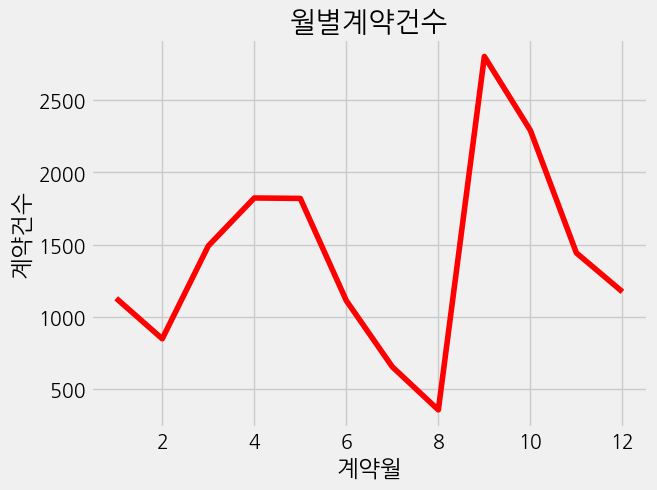

In [57]:
import matplotlib.pyplot as plt
plt.rc("font",family="NanumGothic")

plt.style.use("fivethirtyeight")
# 월별 계약건수
월별계약건수 = apt_price.groupby("계약월")[["층"]].count()
plt.plot(
    월별계약건수.index,
    월별계약건수["층"],
    "r-"
)
plt.title("월별계약건수")
plt.xlabel("계약월")
plt.ylabel("계약건수")

Text(0, 0.5, '계약건수')

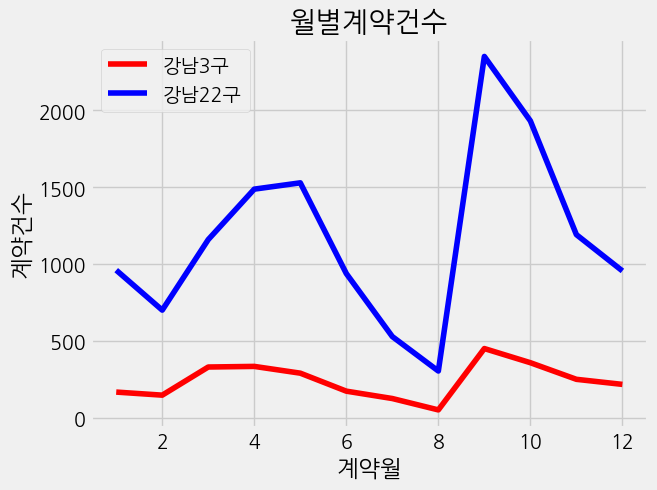

In [58]:
# 월별 계약건수
cond = apt_price["구"].isin(["강남구","서초구","송파구"])
월별계약건수_3구 = apt_price[cond].groupby("계약월")[["층"]].count()
월별계약건수_22구 = apt_price[~cond].groupby("계약월")[["층"]].count()
plt.plot(
    월별계약건수_3구.index,
    월별계약건수_3구["층"],
    "r-",
    label="강남3구"
)
plt.plot(
    월별계약건수_22구.index,
    월별계약건수_22구["층"],
    "b-",
    label="강남22구"
)
plt.legend() # 색깔을 설명하는 범례표시
plt.title("월별계약건수")
plt.xlabel("계약월")
plt.ylabel("계약건수")


<BarContainer object of 25 artists>

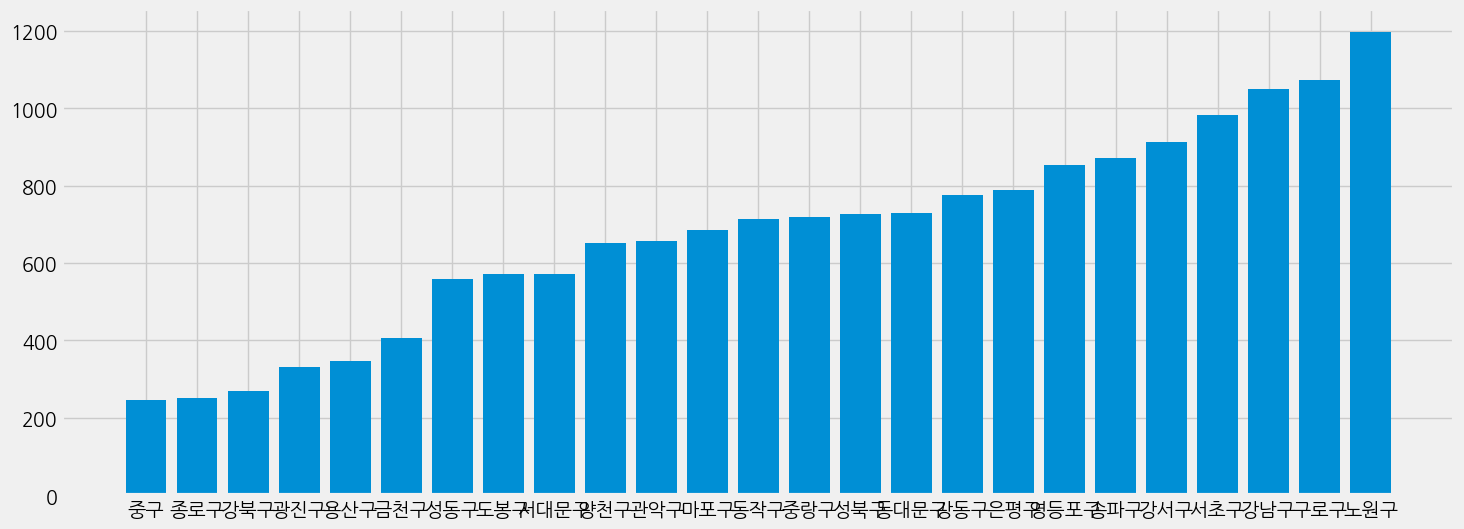

In [59]:
import matplotlib.pyplot as plt
plt.rc("font",family="NanumGothic")
# 구별 계약건수
구별계약건수 = apt_price.groupby("구")[["층"]].count()
구별계약건수 = 구별계약건수.sort_values("층")
plt.figure(figsize=(16, 6))
plt.bar(
    구별계약건수.index,
    구별계약건수["층"]
)


<BarContainer object of 25 artists>

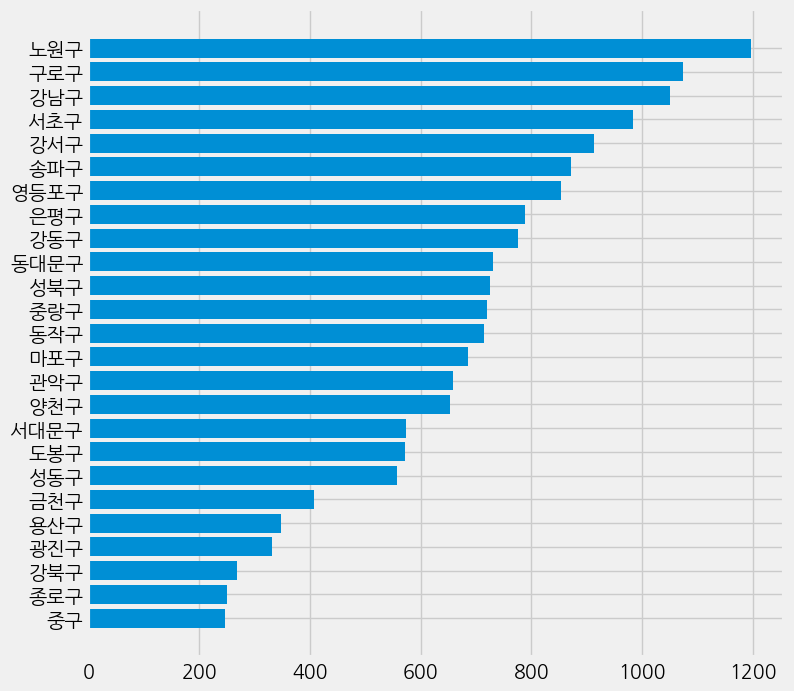

In [60]:
plt.figure(figsize=(8,8))
plt.barh(
    구별계약건수.index,
    구별계약건수["층"]
)

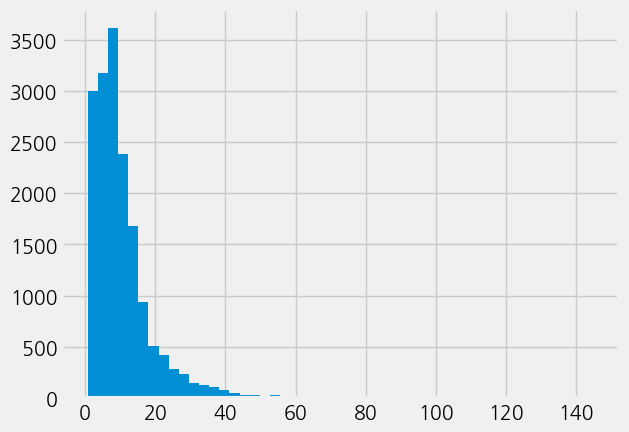

In [61]:
#
_ = plt.hist(apt_price["거래금액_억원"], bins = 50)
plt.show()

<AxesSubplot: xlabel='거래금액_억원'>

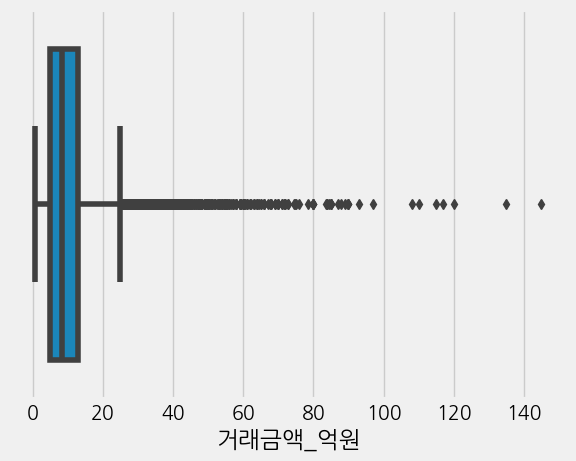

In [63]:
import seaborn as sns
sns.boxplot(
    x =apt_price['거래금액_억원']
)

<AxesSubplot: xlabel='계약월', ylabel='거래금액_억원'>

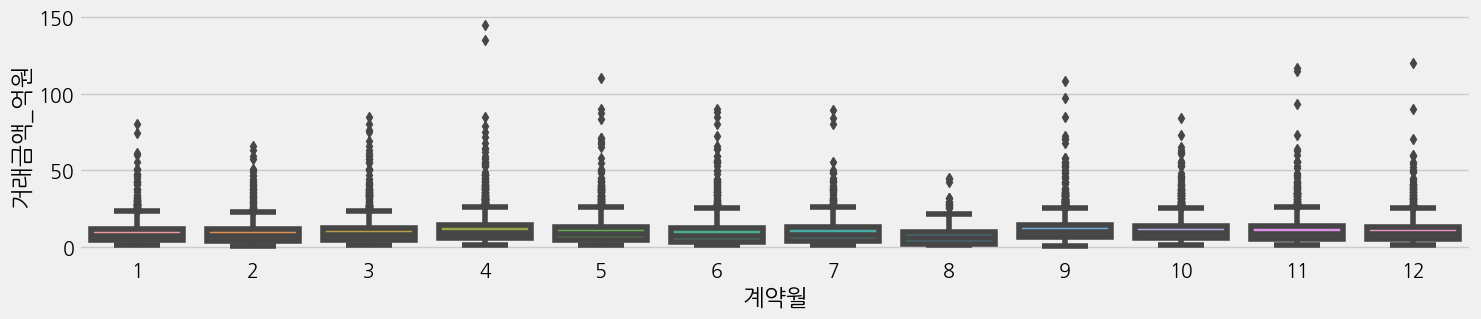

In [64]:
plt.figure(figsize=(16,3))
sns.boxplot(
    data = apt_price,
    y="거래금액_억원",
    x="계약월"
)

In [65]:
# 구별 월별 거래건수
구별월별거래건수 = apt_price.pivot_table(index='구', columns='계약월', values='층', aggfunc='count')
구별월별거래건수

계약월,1,2,3,4,5,6,7,8,9,10,11,12
구,,,,,,,,,,,,
강남구,60,66,93,113,112,65,50,29,147,130,112,73
강동구,51,32,58,70,84,34,31,22,125,124,77,68
강북구,22,12,18,35,25,20,13,11,48,31,21,13
강서구,97,54,81,71,87,52,35,21,153,122,77,63
관악구,44,41,45,71,76,39,19,7,109,108,48,51
광진구,26,14,28,47,43,12,13,6,55,40,30,18
구로구,151,53,91,98,100,70,39,20,158,124,97,72
금천구,25,17,32,44,43,21,21,13,72,68,27,24
노원구,68,57,156,150,103,76,43,19,224,155,87,59


<AxesSubplot: xlabel='계약월', ylabel='구'>

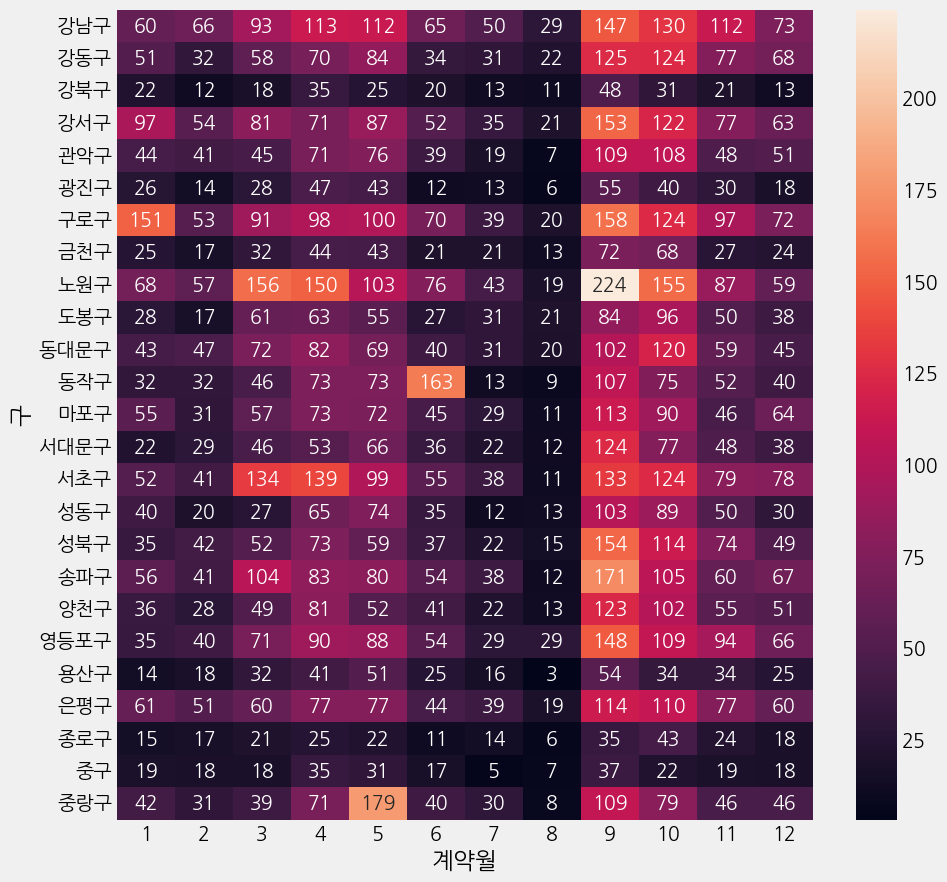

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(구별월별거래건수, annot = True, fmt= 'd')

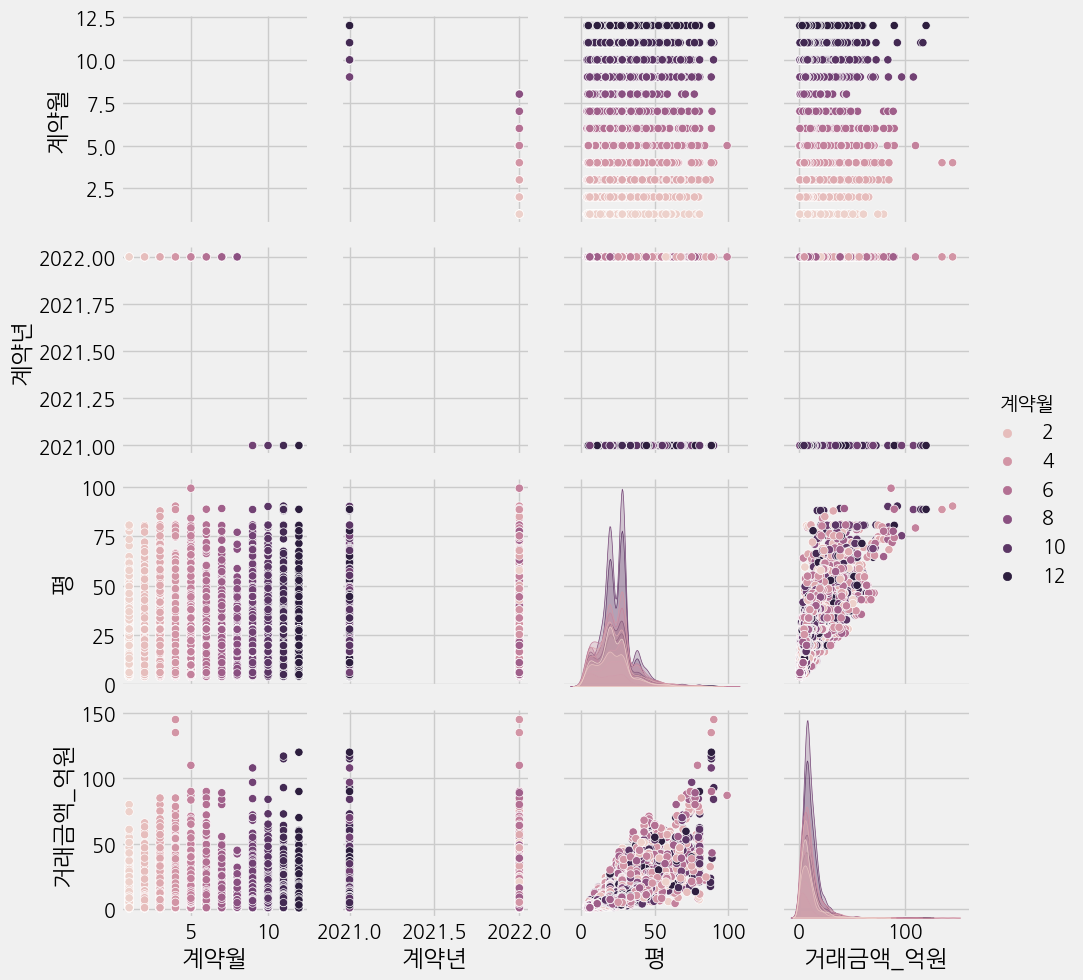

In [67]:
sns.pairplot(
apt_price, hue='계약월', vars=['계약월', '계약년','평','거래금액_억원'])

<AxesSubplot: xlabel='계약월'>

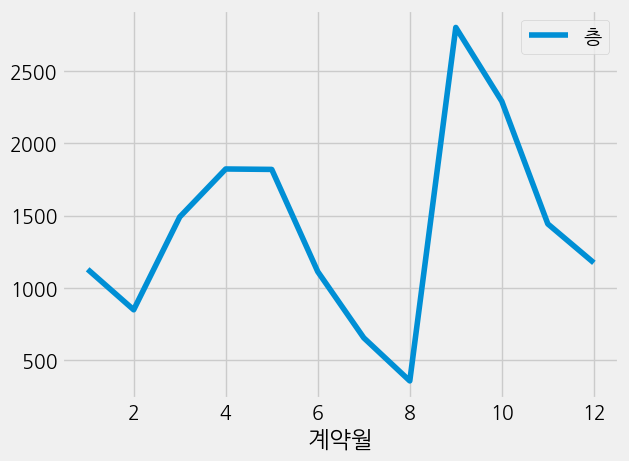

In [68]:
# pandas 시각화
# 월별 거래건수 시각화
apt_price.groupby("계약월")[['층']].count().plot()


<AxesSubplot: xlabel='계약월'>

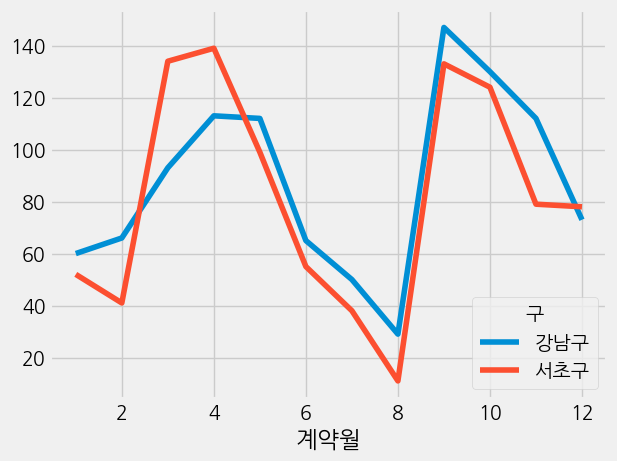

In [69]:
cond = apt_price["구"].isin(["강남구","서초구"])
apt_price[cond].pivot_table(
    index = "계약월",
    columns="구",
    values = "평",
    aggfunc='count'
).plot()

In [70]:
# 월별 강남3구와 그외지역간 거래건수 시각화
cond = apt_price['구'].isin(['강남구','서초구','송파구'])
apt_price['지역구분'] = "일반" # 지역구분 칼럼에 모두 일반으로 설정
apt_price.loc[cond, '지역구분'] = "강남3구" # 강남 3구만 "강남3구" 설정 / DataFrame에 값을 할당할 때는 loc를 쓰는것이 좋다. 

apt_price["지역구분"].value_counts()

일반      14043
강남3구     2904
Name: 지역구분, dtype: int64

<AxesSubplot: xlabel='계약월'>

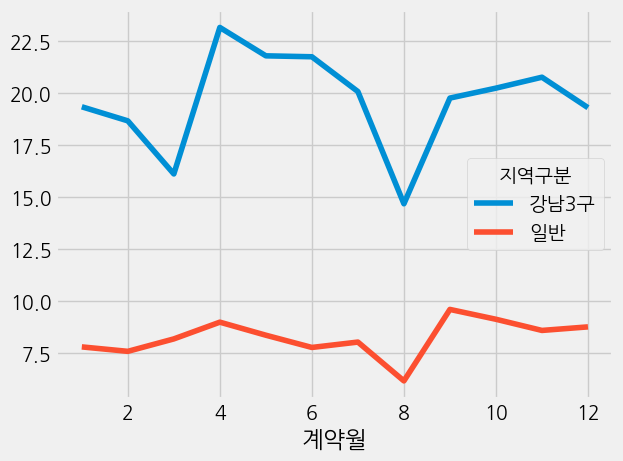

In [71]:
# 월별 강남3구와 그외지역간 거래건수 시각화
apt_price.pivot_table(
    index = "계약월",
    columns="지역구분",
    values = "거래금액_억원",
    aggfunc='mean'
).plot()

<AxesSubplot: xlabel='계약월'>

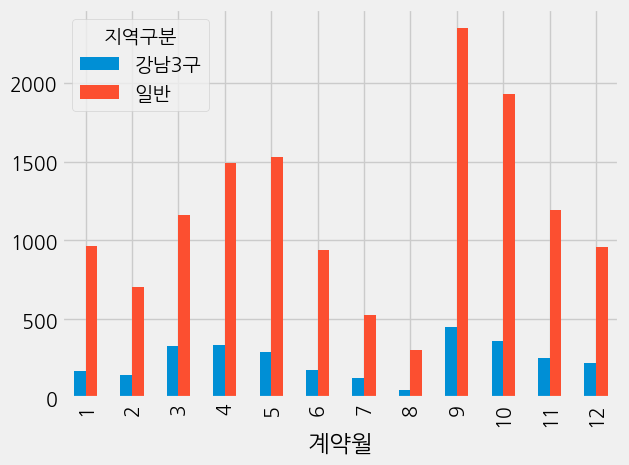

In [72]:
# 월별 강남3구와 그외지역간 거래건수 시각화
apt_price.pivot_table(
    index = "계약월",
    columns="지역구분",
    values = "평",
    aggfunc='count'
).plot(kind='bar')

<AxesSubplot: ylabel='평'>

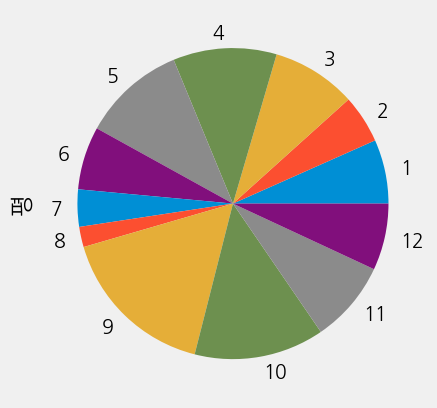

In [73]:
apt_price.pivot_table(
    index = "계약월",
    values = "평",
    aggfunc='count'
)['평'].plot.pie() #(kind = 'bar'가 귀찮으면 이렇게 표현해도 동일함.)

<AxesSubplot: ylabel='Frequency'>

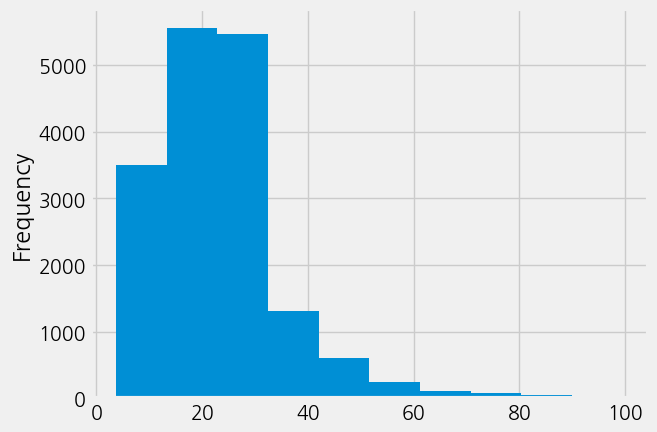

In [74]:
apt_price["평"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

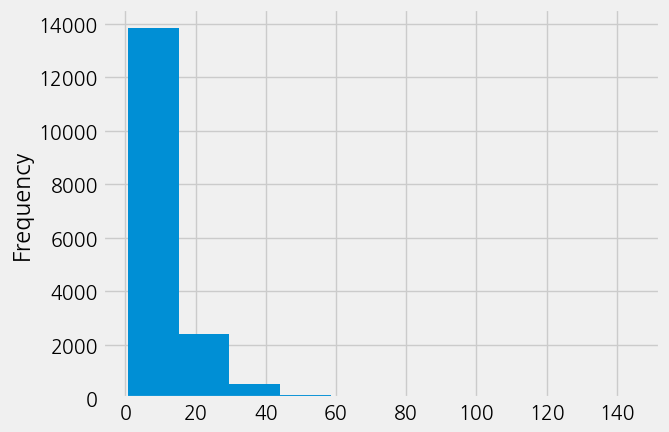

In [75]:
apt_price["거래금액_억원"].plot.hist()

<AxesSubplot: >

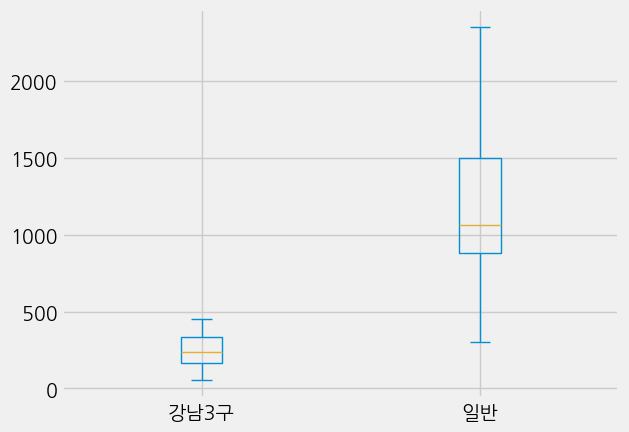

In [76]:
# 월별 강남3구와 그외지역간 거래건수 시각화
apt_price.pivot_table(
    index = "계약월",
    columns="지역구분",
    values = "평",
    aggfunc='count'
).plot(kind='box') # box 그래프는 seaborn 쪽이 활용도가 더 높다. 여기선 통계치에 대해서밖에 처리 못한다.

<AxesSubplot: xlabel='지역구분', ylabel='거래금액_억원'>

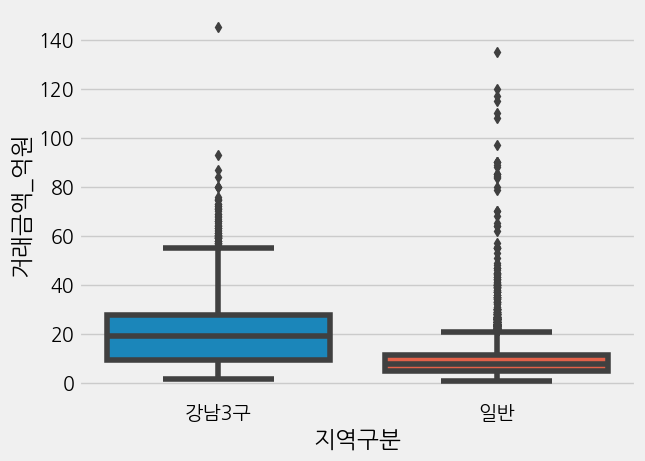

In [77]:
sns.boxplot(x='지역구분', y="거래금액_억원", data=apt_price)